Analysing 911 call data from Kaggle.com

In this project,I analyzed data from 911 calls which were retrieved from Kaggle.
The codes are followed by a description.

In [1]:
import chart_studio.plotly as py
import pandas as pd
import numpy as pandas
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
import plotly.graph_objs as go
import os
pd.set_option('display.max_columns',20)
os.chdir("C:\\users\julie\pJupyterProjects\Data Science")
df = pd.read_csv('911.csv')


print(df.head())
print(df.info())

         lat        lng                                               desc  \
0  40.297876 -75.581294  REINDEER CT & DEAD END;  NEW HANOVER; Station ...   
1  40.258061 -75.264680  BRIAR PATH & WHITEMARSH LN;  HATFIELD TOWNSHIP...   
2  40.121182 -75.351975  HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...   
3  40.116153 -75.343513  AIRY ST & SWEDE ST;  NORRISTOWN; Station 308A;...   
4  40.251492 -75.603350  CHERRYWOOD CT & DEAD END;  LOWER POTTSGROVE; S...   

       zip                    title         timeStamp                twp  \
0  19525.0   EMS: BACK PAINS/INJURY  12/10/2015 17:40        NEW HANOVER   
1  19446.0  EMS: DIABETIC EMERGENCY  12/10/2015 17:40  HATFIELD TOWNSHIP   
2  19401.0      Fire: GAS-ODOR/LEAK  12/10/2015 17:40         NORRISTOWN   
3  19401.0   EMS: CARDIAC EMERGENCY  12/10/2015 17:40         NORRISTOWN   
4      NaN           EMS: DIZZINESS  12/10/2015 17:40   LOWER POTTSGROVE   

                         addr  e  
0      REINDEER CT & DEAD END  1  
1  B

The head() method shows that there the data contains the exact longitutde and latitude of the 911 calls, and the zip codes have some values that are NaN. The inf() method shows that the timestamp is labelled as an object, and that there are an imbalanced amount of entries in the columns.

In [5]:
print(df["zip"].value_counts().head())
print(df["twp"].value_counts().head())

19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: zip, dtype: int64
LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: twp, dtype: int64


This code shows the top 5 zipcodes, followed by the top 5 townships where 911 calls occured using value_counts().

In [6]:
print(df["title"].nunique())

110


There are 110 unique 911 calls. 
Interestingly, in the titles column there are "Reasons/Departments" specified before the title code. 

In [9]:
df["reason"] = df["title"].apply(lambda x: x.split()[0])
df['reason'] = df['reason'].str.replace (':', '')
print(df["reason"].head(10))
print(df["reason"].nique())
print(df["reason"].unique())

0        EMS
1        EMS
2       Fire
3        EMS
4        EMS
5        EMS
6        EMS
7        EMS
8        EMS
9    Traffic
Name: reason, dtype: object
['EMS' 'Fire' 'Traffic']


Used .apply() with a custom lambda expression to create a new column called "Reason" that contains the string value of reason. 
The nunique() and unique() method indicates that there are 3 main reasons for 911 calls (Fire, EMS, Traffic).

EMS        48877
Traffic    35695
Fire       14920
Name: reason, dtype: int64


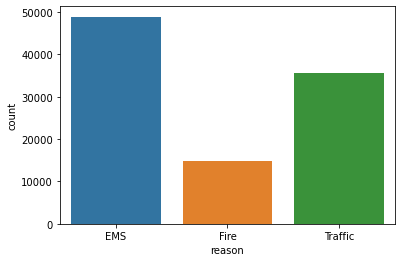

In [11]:
print(df["reason"].value_counts())
sns.countplot(data=df,x="reason")
plt.show()

The main reason for a 911 call is for EMS.

In [12]:
df['timeStamp'] = pd.to_datetime(df['timeStamp'])
print(type(df['timeStamp'][0]))
time = df['timeStamp'].iloc[0]
print(time.hour)

<class 'pandas._libs.tslibs.timestamps.Timestamp'>
17


Used the pd.to_datetime() method to convert the column from strings to DateTime objects

In [13]:
df["Hour"] = df["timeStamp"].apply(lambda x: x.hour)
print(df['Hour'].head())
df["Month"] = df["timeStamp"].apply(lambda x: x.month)
print(df['Month'].head())
df['Day'] = df["timeStamp"].dt.day_name()
print(df['Day'].head())

0    17
1    17
2    17
3    17
4    17
Name: Hour, dtype: int64
0    12
1    12
2    12
3    12
4    12
Name: Month, dtype: int64
0    Thursday
1    Thursday
2    Thursday
3    Thursday
4    Thursday
Name: Day, dtype: object


Used .apply() to create 3 new columns called Hour, Month, and Day of Week based off of the timeStamp column.

In [14]:
df['Day'] = df["timeStamp"].apply(lambda x: x.dayofweek)
dmap = {0: 'Mon', 1: 'Tue', 2: 'Wed', 3: 'Thu', 4: 'Fri', 5: 'Sat', 6: 'Sun'}
df['Day'] = df['Day'].map(dmap)

In [ ]:
Renames the day of the week by its abbreviation.

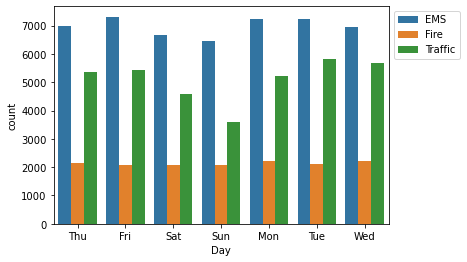

In [15]:
sns.countplot(data=df,x="Day",hue="reason")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.87))
plt.show()

Countplot of the Day of Week column with the hue based off of the Reason column.
The countplot shows that the "Traffic" reason for calling 911 is the lowest on Sunday and that the "EMS" and "Fire" reasons are steady throughout the week with a small decrease in the amount of 911 calls for EMS on SUndays.

In [17]:
byMonth = df.groupby("Month").count()
print(byMonth.head())

         lat    lng   desc    zip  title  timeStamp    twp   addr      e  \
Month                                                                      
1      13205  13205  13205  11527  13205      13205  13203  13096  13205   
2      11467  11467  11467   9930  11467      11467  11465  11396  11467   
3      11101  11101  11101   9755  11101      11101  11092  11059  11101   
4      11326  11326  11326   9895  11326      11326  11323  11283  11326   
5      11423  11423  11423   9946  11423      11423  11420  11378  11423   

       reason   Hour    Day  
Month                        
1       13205  13205  13205  
2       11467  11467  11467  
3       11101  11101  11101  
4       11326  11326  11326  
5       11423  11423  11423  


The code creates a groupby object called byMonth, where the DataFrame is grouped by the month column and the count() method 
is used for aggregation.
Some columns have a different count than other columns because in some cells, there are some values that are missing. 

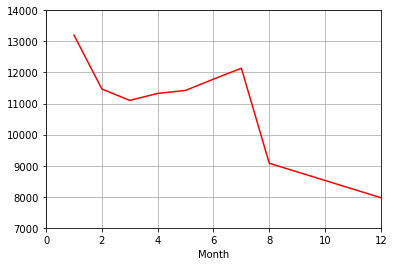

In [18]:
sns.lineplot(data=byMonth,x="Month",y="lat",color='red')
plt.grid()
plt.ylabel("")
plt.ylim(7000,14000)
plt.xlim(0,12)
plt.show()

Used the latitude column for the y axis, because if there was a latitude for the call it means that the call took place. 
The count plot shows a steady decrease in the amount of 911 calls from january to decemeber, with a small increase from march to July.

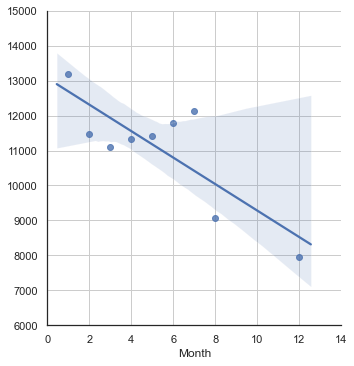

In [19]:
byMonth=byMonth.reset_index()

sns.set(style="white", color_codes=True)
sns.lmplot(x="Month",y="twp",data=byMonth,truncate=False)
plt.grid()
plt.ylabel("")
plt.xlim(0,14)
plt.ylim(6000,15000)
plt.show()

Faded areas represents the errors, and the line further proves the point that the amount of 911 calls decreased from January to December.

In [25]:
matrix1= df.groupby(by=['Day','Hour']).count()['reason'].unstack()
print(matrix1)

Hour   0    1    2    3    4    5    6    7    8    9   ...   14   15    16  \
Day                                                     ...                   
Fri   275  235  191  175  201  194  372  598  742  752  ...  932  980  1039   
Mon   282  221  201  194  204  267  397  653  819  786  ...  869  913   989   
Sat   375  301  263  260  224  231  257  391  459  640  ...  789  796   848   
Sun   383  306  286  268  242  240  300  402  483  620  ...  684  691   663   
Thu   278  202  233  159  182  203  362  570  777  828  ...  876  969   935   
Tue   269  240  186  170  209  239  415  655  889  880  ...  943  938  1026   
Wed   250  216  189  209  156  255  410  701  875  808  ...  904  867   990   

Hour    17   18   19   20   21   22   23  
Day                                       
Fri    980  820  696  667  559  514  474  
Mon    997  885  746  613  497  472  325  
Sat    757  778  696  628  572  506  467  
Sun    714  670  655  537  461  415  330  
Thu   1013  810  698  617  553

Restructures the dataframe so that the columns become the Hours and the Index becomes the Day of the Week.
This allows the data to be plotted with a matrix.

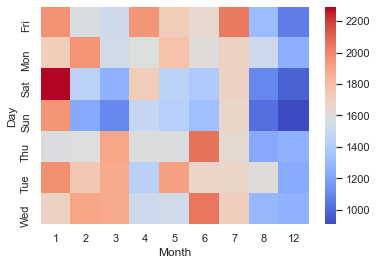

In [27]:
matrix1= df.groupby(by=['Day','Month']).count()['reason'].unstack()
sns.heatmap(matrix1,cmap='coolwarm')
plt.show()

The Matrix demonstrates that the Saturdays of January had the most 911 calls and the the Sundays of December had the 
least amont of 911 calls.